In [1]:
""" Imports and settings """

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import warnings

%matplotlib inline
plt.style.use('ggplot')   # style for plots


In [2]:
""" Constants """

NN = 100   # Ceiling for range of prime numbers to find
SL = 5   # Segment length

MM = 4620# ideas: 2, 6, 30, 210, 2310, 30030, 510510, 9699690, 223092870
COORDS_INI = (0, 0)

SEG_COLOR_INI = "#337733"
SEG_COLORS = [ "#330000", "#aa0000", "#aa6600", "#ccaa22", "#ddbb88", "#bbdd88" ] + 20*["#aaaaaa"]
SPN1, SPN2 = 195,345 # 40,280 # 195,345
RND_RNG = 10
LWT = 5

GRPH_CLR_BG = "#bbbbbb"
GRPH_CLR_FC = "#929292"
GRPH_ANNOT_FT_SZ = 14
GRPH_ANNOT_FT_SZ_2 = 12


In [3]:
""" Prime numbers """

prms = []

for i in range(2,NN):
    for prm in prms:
        if i%prm==0:
            break
    else:
        prms.append(i)

print (prms)


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [4]:
""" Class for line segment """

class LSeg (object):
    clrs = {}
    def __init__ ( self, n, div, p0, p1, clr=SEG_COLOR_INI, wt=3, \
                   clr_ends=None, directed_b=False ):
        self.n = n
        self.div = div   # divisor; possessed when creating a LSeg. Used for checking uniqueness with {m,div}
        self.p0 = p0
        self.p1 = p1
        self.clr = LSeg.clrs[self.div]
        self.wt = wt
        self.clr_ends = clr_ends or self.clr
        self.directed_b = directed_b


In [5]:
""" Functions to produce line segments from number m """

def graph_m ( m=2, span1=SPN1, span2=SPN2, p0=(0,0) ):
    """ Plots gracefully """
    
    global dirs, divs
    sp1, sp2, rr = span1*np.pi/180., span2*np.pi/180., RND_RNG*np.pi/180.
    
    divs = [ p for p in prms if m%p==0 ]
    print ( "Prime divisors: {}".format(divs) )
    for i,div in enumerate(divs):
        LSeg.clrs[div] = SEG_COLORS[i]
    n_dirs = len(divs)
    
    if n_dirs == 1:
        dirs[divs[0]] = np.average(sp1, sp2)
    elif n_dirs > 1:
        dirs = { divs[n] : sp1 + (sp2-sp1)*n/(n_dirs-1) + \
                random.uniform(-rr,rr) for n in range(n_dirs) }
    print ( str(sp2-sp1), n_dirs, str(n_dirs-1), str(sp1) )
    divs = list(dirs.keys())
    print ([i*180/np.pi for i in dirs.values()])
    explore_divs (m, 2, p0)
    
    return



def explore_divs (m, div, p0):
    """ Hello ambiguous recursive(!) """
    for div in divs:
        if m%div == 0:
            p1 = ( p0[0] + SL*np.cos(dirs[div]),\
                   p0[1] + SL*np.sin(dirs[div]) )
            if (m,div) not in segs_msdivs:
                segs_msdivs.append ((m,div))
                segs.append ( LSeg(m, div, p0, p1, wt=LWT, clr_ends="#aa3311") )
            #print ( [[seg.p0,seg.p1] for seg in segs] )
            explore_divs ( m//div, div, p1 )



In [6]:
""" Actuate (?) """

segs = []
segs_msdivs = []
divs = []
dirs = {}

# calling the interesting part where everything happens
graph_m ( MM, p0=COORDS_INI )
line_segs = [ [seg.p0,seg.p1] for seg in segs ]

# print ( "         ".join( [str(seg) for seg in line_segs] ) )
print ( "Segments' m.s: {}\n".format( len(segs) ) )
# print ( "{}\n".format( [ seg.n for seg in segs ] ) )
# for seg in segs:
#     print ( " {}: [ ({:.3g},{:.3g}) -> ({:.3g},{:.3g}) ]  ".\
#          format ( seg.n, seg.p0[0],seg.p0[1],seg.p1[0],seg.p1[1] ) )


Prime divisors: [2, 3, 5, 7, 11]
2.617993877991495 5 4 3.4033920413889422
[198.72693833880174, 237.84203374700803, 276.3965072755328, 314.43749101468916, 354.9879594736781]
Segments' m.s: 128



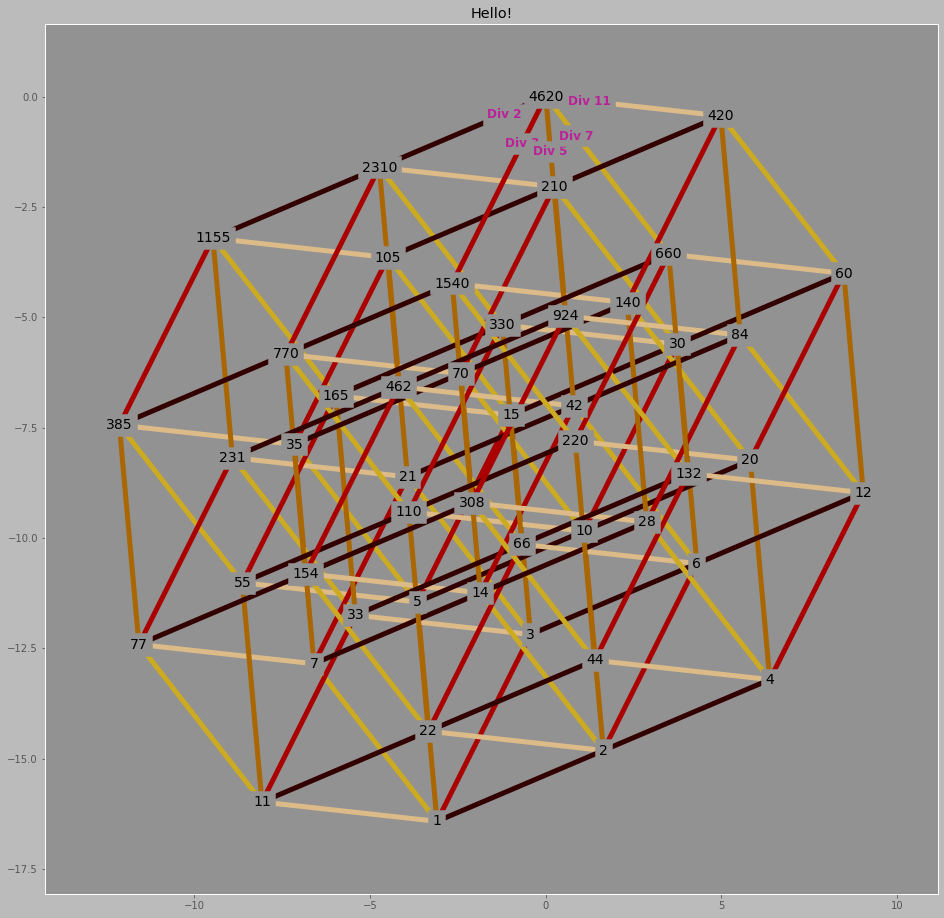

In [7]:
""" Graph """

# Initialize range parameters as initial points coords
xmn, xmx = segs[0].p0[0], segs[0].p0[0]
ymn, ymx = segs[0].p0[1], segs[0].p0[1]

for seg in segs:
    (x, y) = seg.p1
    if x < xmn: xmn = x
    if x > xmx: xmx = x
    if y < ymn: ymn = y
    if y > ymx: ymx = y

xmrg = (xmx-xmn)*0.1
ymrg = (ymx-ymn)*0.1

lc = mc.LineCollection ( line_segs, colors=[seg.clr for seg in segs], \
                        linewidths=[seg.wt for seg in segs] )

fig = plt.figure ( figsize=(16,16), facecolor=GRPH_CLR_BG )
plt.grid(False)
ax = plt.gca()
ax.set_facecolor(GRPH_CLR_FC)
ax.set_xlim ( xmn-xmrg, xmx+xmrg )
ax.set_ylim ( ymn-ymrg, ymx+ymrg )
ax.set_title ("Hello!")
# xs,ys = tuple(zip(seg.p0, seg.p1))
ax.add_collection(lc)
# for seg in segs:
#     plt.plot ( x=xs, y=ys, width=seg.wt, color=seg.clr, style='o--', end_color=clr_ends )

# Annotate
one_todo = True
m_set_done = set()   # Keeping track of numbers annotated, so we avoid annotating same multiply
base_segs = []

for seg in segs:
    # Annotate division on initial segments
    if seg.n == MM:
        ax.annotate ( "Div {}".format(seg.div), xy=(0,0), \
                     xytext= ( np.average([seg.p0[0],seg.p1[0]], weights=[3,1]), \
                              np.average([seg.p0[1],seg.p1[1]], weights=[3,1]) ), \
                     size=GRPH_ANNOT_FT_SZ_2, weight='bold', color="#bb2299", \
                     ha='center', va='center', backgroundcolor=GRPH_CLR_FC, zorder=12 )    
    # Do vertices' numeric values
    if seg.n not in m_set_done:
        #ax.scatter ( seg.p0[0], seg.p0[1], c='w', s=500, alpha=0.4, zorder=10 )
        ax.annotate ( seg.n, xy=(0,0), xytext=seg.p0, size=GRPH_ANNOT_FT_SZ, weight='normal', \
                   ha='center', va='center', backgroundcolor=GRPH_CLR_FC, zorder=12 )    
        m_set_done.add( seg.n )
    # Do '1'
    if one_todo and seg.n in prms:   # The segment initiating with prime number leads to '1'
        one_todo = False
        #ax.scatter ( segs[-1].p1[0], segs[-1].p1[1], c='w', s=100, alpha=0.7, zorder=10 )
        ax.annotate( 1, seg.p1, xytext=seg.p1, size=GRPH_ANNOT_FT_SZ, weight='normal', \
                       ha='center', va='center', backgroundcolor=GRPH_CLR_FC, zorder=12 )

plt.show()

# TODO: Make stereographic! (2 with slightly different angles?)
